### Cars Dataset
Source : https://www.kaggle.com/abineshkumark/carsdata

Cars Data has Information about 3 brands/make of cars. Namely US, Japan, Europe.

Target of the data set to find the brand of a car using the parameters such as horsepower, Cubic inches, Make year, etc.

Clustering using labelled data 

### Importing Libraries

In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score

### Import Data/CSV files

In [55]:
data = pd.read_csv('Cars.csv')

data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [56]:
data.shape

(261, 8)

### Taking full fraction of data
It shuffles the data

In [57]:
data = data.sample(frac=1)

### Checking for Nulls

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 193 to 22
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


### Removing leading space from column names and droping nulls

In [59]:
data.columns = data.columns.str.lstrip()

In [60]:
data.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [61]:
data['cubicinches']= pd.to_numeric(data['cubicinches'], errors='coerce')
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors='coerce')

In [62]:
data.dropna(inplace=True)

In [63]:
data.shape

(256, 8)

### Encoding the Brand into numerical form by using label encoding

In [64]:
labelEncoder = LabelEncoder()
data['brand'] = labelEncoder.fit_transform(data['brand'].astype(str))
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
193,15.0,8,350.0,145,4082.0,13,1974,2
140,26.8,6,173.0,115,2700.0,13,1980,2
218,28.8,6,173.0,115,2595.0,11,1980,2
213,30.0,4,79.0,70,2074.0,20,1972,0
87,17.6,6,225.0,85,3465.0,17,1982,2


### Assigning the variables into x and y.

In [65]:
data_x = pd.DataFrame(data, columns=['mpg', 'cubicinches', 'cylinders', 'hp'])
data_y = data['brand']

### Scatter plot

Text(0, 0.5, 'Weight')

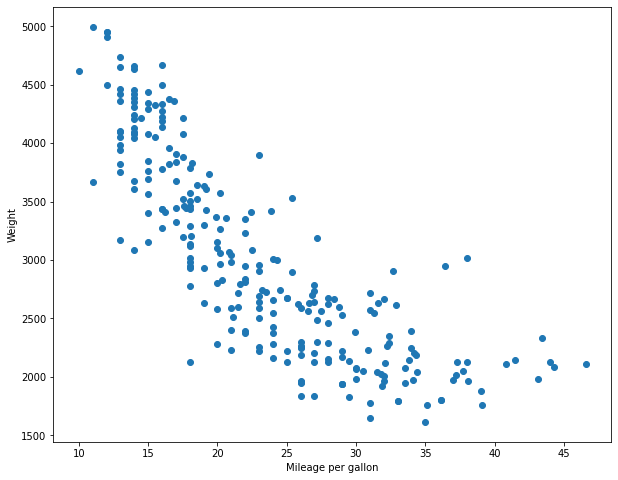

In [66]:
plt.figure(figsize=(10,8))
plt.scatter(data['mpg'], data['weightlbs'])
plt.xlabel("Mileage per gallon")
plt.ylabel("Weight")


In [ ]:
### Creating a function that gives you an elbow plot to show the best # of clusters needed for best possible clustering 

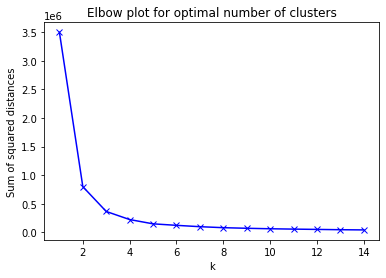

In [67]:
sum_of_squared_distances = []
K = range(1, 15)

for k in K:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(data_x)
    #interia property will give us the sum of the squared distances of the data points from the cluster centers - a measure of how good the clustering is
    sum_of_squared_distances.append(k_means.inertia_)


plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')

plt.title('Elbow plot for optimal number of clusters')
plt.show()

### KMeans assigning 3 clusters needed for best possible clustering 

In [68]:
k_means = KMeans(n_clusters=3)
k_means = k_means.fit(data_x)

### Silhouette Score 

In [69]:
sil_score = silhouette_score (data_x, k_means.labels_)

print("Score = ", score)

Score =  0.6323149311159748


### Homogeneity Score

When data has original/actual labels you can calculate other measure to evaluate clustering.
Clustering satisfies homogeniety if all clusters contain only points from same class

In [70]:
hmg_score = homogeneity_score(data_y, k_means.labels_)

print("Homogeneity Score = ", hmg_score)

Homogeneity Score =  0.31550036277564175


### VM Score
Harmonic mean of homoegeneity score and the completeness score - harmonic mean usually used to find the average of rates . Actual labels vs cluster labels

In [71]:
vm_score = v_measure_score(data_y, k_means.labels_)

print("V Measure Score = ", vm_score)

V Measure Score =  0.3003375614022765


### Completeness Score
Clustering satisfies completeness if all of the points that are members of the same class belong to the same cluster


In [73]:
comp_score = completeness_score(data_y, k_means.labels_)

print("Completeness Score = ", comp_score)

Completeness Score =  0.28656536273532296


#### Adjusted-rand score
Similarity measure between clusters which is adjusted for chance ex. random labelling of data points

In [74]:
adj_r_score = adjusted_rand_score(data_y, k_means.labels_)

print("Adjusted_rand Score = ", adj_r_score)

Adjusted_rand Score =  0.11281925794858025


### Adjusted-mutual score
Information obtained about one random variable by oberving another random variable adjusted to account for chance

In [75]:
adj_mutual = adjusted_mutual_info_score(data_y, k_means.labels_, average_method='arithmetic')

print("Adjusted mutual Score = ", adj_mutual)

Adjusted mutual Score =  0.294598184253296
